# (실습) matplotlib.pyplot 1부

**기본 설정**

In [2]:
import numpy as np

맷플롯립<font size='2'>Matplotlib</font>은 간단한 그래프 도구를 제공하는 라이브러리다.
맷플롯립의 대부분의 함수는 파이플롯<font size='2'>pyplot</font> 모듈에 포함되어 있으며
관행적으로 `plt` 별칭으로 불러온다.

In [3]:
import matplotlib.pyplot as plt

## 미니 프로젝트: 붓꽃 데이터셋 분류 그래프

붓꽃 데이터셋을 아래 방식으로 불러온다.

In [4]:
from sklearn.datasets import load_iris 

iris = load_iris(as_frame=True)

:::{admonition} 사이킷런<font size='2'>scikit-learn</font> 라이브러리
:class:

사이킷런 라이브러리는 머신러닝에 가장 중요한 라이브러리 중 하나며,
다양한 데이터셋을 기본으로 제공한다.
:::

In [5]:
#pip install scikit-learn #머신러닝 핵심 라이브러리리

`load_iris()` 함수의 반환값은 사이킷런 라이브리의 `utils` 모듈에서 정의된 `Bunch` 자료형이다.

In [6]:
type(iris) # dict와 유사

sklearn.utils._bunch.Bunch

`Bunch` 객체는 데이터셋을 사전 형식으로 담으며, 키를 객체의 속성처럼 다룰 수 있다.
사용된 키를 확인해보자.

In [7]:
print(iris.keys())
print(iris.values())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
dict_values([     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.

이중에 붓꽃 데이터는 `'data'` 키의 값으로 저장되어 있으며, 데이터프레임 객체다.

In [8]:
iris.data # iris['data'] #/변수로 접근 , 인덱싱 접근 | 단, 변수이름에 띄어쓰기가 있다면 사용불가가

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


품종 데이터는 `'target'` 키의 값으로 저장되어 있으려, 시리즈 객체다.

| 기호 | 품종 |
| :---: | :---: |
| 0 | 세토사(Iris setosa) |
| 1 | 버시컬러(Iris versicolor) |
| 2 | 버지니카(Iris verginica) |

In [9]:
iris.target # iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

시각화를 위해 꽃잎<font size='2'>petal</font>의 길이와 너비 두 개의 특성만 선택한다.

* `values` 속성: 데이터프레임 또는 시리즈의 항목으로 구성된 넘파이 어레이

In [29]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values

꽃잎의 길이와 너비를 이용하여 품종별로 산점도를 그려보자.
먼저 세토사 품종의 데이터는 다음과 같다.

In [30]:
mask_setosa = (y == 0)
X_setosa = X[mask_setosa]

50개의 샘플로 구성된다.

In [31]:
X_setosa.shape

(50, 2)

버시컬러 데이터셋과 버지니카 데이터셋도 동일한 방식으로 구해진다.

In [32]:
mask_versicolor = (y == 1)
X_versicolor = X[mask_versicolor]

In [33]:
mask_verginica = (y == 2)
X_verginica = X[mask_verginica]

각 데이터셋의 산점도를 다른 색을 이용하여 그리면 다음과 같다.

In [27]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    try:
        font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트를 사용
        font = mpl.font_manager.FontProperties(fname=font_path).get_name()
        plt.rc('font', family=font)
    except FileNotFoundError:
        print("폰트 파일을 찾을 수 없습니다. 다른 경로를 확인하세요.")

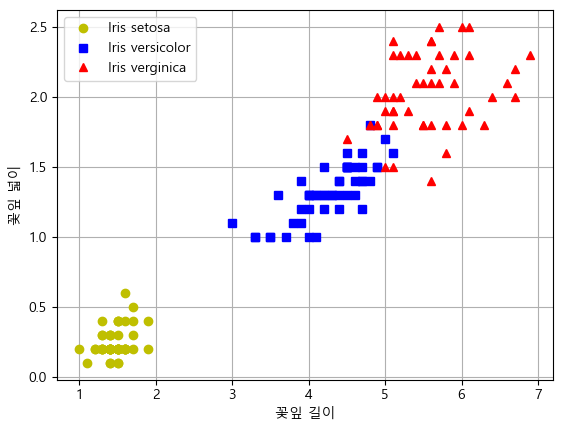

In [35]:
plt.plot(X_setosa[:, 0], X_setosa[:, 1], "yo", label="Iris setosa")             # 노랑 원
plt.plot(X_versicolor[:, 0], X_versicolor[:, 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X_verginica[:, 0], X_verginica[:, 1], "r^", label="Iris verginica")    # 빨강 세모

plt.xlabel("꽃잎 길이")
plt.ylabel("꽃잎 넓이")
plt.legend(loc="upper left")
plt.grid()


plt.show()

범위를 x 축은 0에서 7.5 사이로,
y 축은 0에서 3 사이로 지정한 다음에
축의 척도를 일치 시키면 그림이 사뭇 다르게 보인다.

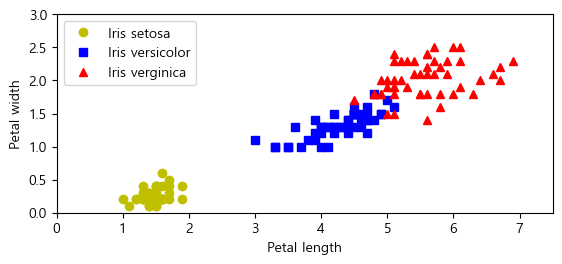

In [17]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")     # 노랑 원
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "r^", label="Iris verginica")  # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")

plt.show()

격자 무늬 배경도 추가하자.

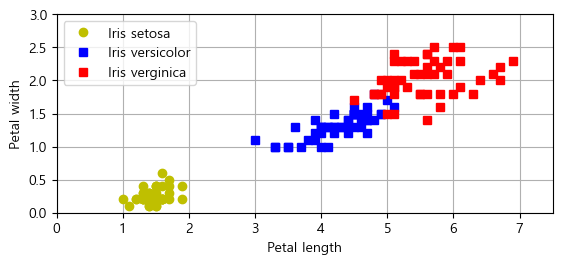

In [18]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")     # 노랑 원
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "rs", label="Iris verginica")  # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

아래 코드는 두 개의 직선을 그린다.

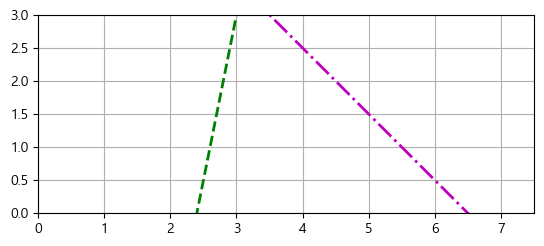

In [19]:
# x 좌표
x0 = np.linspace(0, 7.5, 200) # 0부터 7.5 사이를 200개의 작은 구간으로 균등하게 쪼갠 x 좌표값

# 두 개의 직선에 대한 y 좌표값
pred_1 = 5 * x0 - 12  # 직선 1의 y 좌표
pred_2 = -x0 + 6.5    # 직선 2의 y 좌표

plt.plot(x0, pred_1, "g--", linewidth=2) # 직선 1
plt.plot(x0, pred_2, "m-.", linewidth=2) # 직선 2

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

위 두 직선과 붓꽃 데이터셋의 산포도를 합치면
품종을 구별하는 경계선을 얻는다.

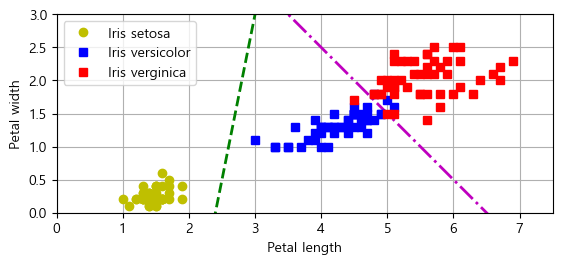

In [20]:
x0 = np.linspace(0, 7.5, 200)
pred_1 = 5 * x0 - 12
pred_2 = -x0 + 6.5
pred_3 = 0.05 * x0 + 0.6

plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-.", linewidth=2)
# plt.plot(x0, pred_3, "y-", linewidth=2)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")     # 노랑 원
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rs", label="Iris verginica")  # 빨강 세모
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()